In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

## Learning Curves

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)  

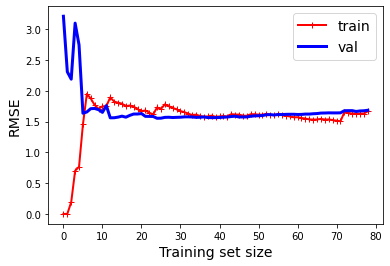

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

(0.0, 10.0)

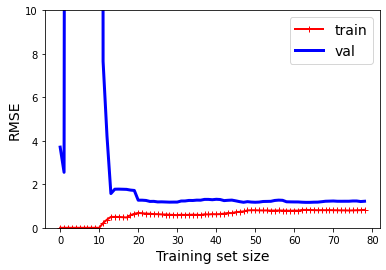

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 10);

In [21]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly_X = poly.fit_transform(X)

In [23]:
# poly_X

## The Bias/Variance Tradeoff
An important theoretical result of statistics and Machine Learning is the fact that a
model’s generalization error can be expressed as the sum of three very different
errors:
#### Bias
This part of the generalization error is due to wrong assumptions, such as assum‐
ing that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.10
#### Variance
This part is due to the model’s excessive sensitivity to small variations in the
training data. A model with many degrees of freedom (such as a high-degree pol‐
ynomial model) is likely to have high variance, and thus to overfit the training
data.
#### Irreducible error
This part is due to the noisiness of the data itself. The only way to reduce this
part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).<br>
Increasing a model’s complexity will typically increase its variance and reduce its bias.
Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff.

## Regularization

*Ridge Regression* (also called *Tikhonov regularization*) is a regularized version of Lin‐
ear Regression: a regularization term equal to $\alpha\sum_{i=1}^n\theta_i^2$ is added to the cost function. The cost function becomes:
$$J(\theta) = \text{MSE}(\theta) + \alpha\sum_{i=1}^n\theta_i^2$$
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2 + \alpha\sum_{i=1}^n\theta_i^2$$
Note that the bias term $\theta_0$ is not regularized.

>It is important to scale the data (e.g., using a `StandardScaler`)
before performing Ridge Regression, as it is sensitive to the scale of
the input features. This is true of most regularized models.

<img src="img/04_01.png">

Using skikit-learn’s `Ridge` class, we can fit a model with a regularization

In [32]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(poly_X, y)
ridge_reg.predict(poly.transform([[1.5]]).reshape(1, -1))

array([[4.76553958]])

Using `SGD`

In [36]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(poly_X, y.ravel())
sgd_reg.predict(poly.transform([[1.5]]).reshape(1, -1))

array([-3.95935421e+14])

The `penalty` hyperparameter sets the type of regularization term to use. Specifying
"l2" indicates that you want SGD to add a regularization term to the cost function
equal to half the square of the $ℓ_2$ norm of the weight vector: this is simply Ridge
Regression.

## Lasso Regression
*Least Absolute Shrinkage and Selection Operator Regression* (simply called Lasso
Regression) is another regularized version of Linear Regression: just like Ridge
Regression, it adds a regularization term to the cost function, but it uses the $ℓ_1$ norm
of the weight vector instead of half the square of the $ℓ_2$ norm.
$$ J(\theta) = \text{MSE}(\theta) + \alpha\sum_{i=1}^n|{\theta_i}|$$

<img src="img/04_02.png">

>An important characteristic of Lasso Regression is that it tends to completely elimi‐
nate the weights of the least important features (i.e., set them to zero). In
other words, Lasso Regression automatically performs feature selection and outputs a
sparse model (i.e., with few nonzero feature weights).

In [40]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1, max_iter=100000)
lasso_reg.fit(poly_X, y)
lasso_reg.predict(poly.transform([[1.5]]).reshape(1, -1))

array([4.02321])

In [41]:
lasso_reg.coef_

array([ 7.03013509e-01,  0.00000000e+00,  0.00000000e+00,  2.10172118e-01,
       -0.00000000e+00,  0.00000000e+00,  6.27645885e-03, -7.82592460e-03,
       -6.94424042e-04,  6.78291259e-04])

## Elastic Net
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression.
$$ J(\theta) = \text{MSE}(\theta) + r\alpha\sum_{i=1}^n|{\theta_i}| + \frac{1-r}{2}\sum_{i=1}^n\theta_i^2$$

In [45]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=100000)
elastic_net.fit(poly_X, y)
elastic_net.predict(poly.transform([[1.5]]).reshape(1, -1))

array([4.13396729])

In [43]:
elastic_net.coef_

array([ 8.01497018e-01,  1.36311075e-01,  0.00000000e+00,  1.73051926e-01,
       -2.50862117e-02, -0.00000000e+00,  1.22749147e-02, -7.04861257e-03,
       -1.07202870e-03,  6.22254278e-04])

## Early Stopping
A very different way to regularize iterative learning algorithms such as Gradient
Descent is to stop training as soon as the validation error reaches a minimum. This is
called early stopping.

In [50]:
X_train = X[:80]
X_val = X[80:]
y_train = y[:80]
y_val = y[80:]

# Logistic Regression

## Estimating Probabilities
Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the
logistic of this result.
### Logistic Function
$$h_\theta(x) = \frac{1}{1+e^{-\theta^T x}}$$

Text(0.5, 1.0, 'Logistic Function')

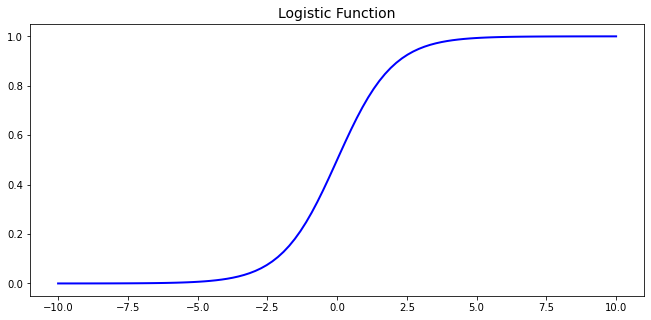

In [55]:
plt.figure(figsize=(11, 5))
x = np.linspace(-10, 10, 100)
y = lambda x: 1/(1 + np.exp(-x))
plt.plot(x, y(x), "b-", linewidth=2)
plt.title("Logistic Function", fontsize=14)

### Cost Function
The cost function for Logistic Regression is:
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m\left[y^{(i)} \log(h_\theta(x^{(i)})) +(1-y^{(i)})\log(1-h_\theta(x^{(i)}))\right]$$
The partial derivative of the cost function for Logistic Regression is:
$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m\left[h_\theta(x^{(i)}) - y^{(i)}\right]x_i$$

## Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly,
without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.<br>
The idea is quite simple: when given an instance x, the Softmax Regression model
first computes a score $s_k(x)$ for each class k, then estimates the probability of each
class by applying the softmax function.

### Softmax Function
$$\text{softmax}(x) = \frac{\exp(x_1)}{\sum_{k=1}^K\exp(x_k)}$$
The prediction function for Softmax Regression is:
$$\hat{y} = \text{argmax}_k\left(\text{softmax}(x^T\theta)\right)$$
That is, the model predicts the class with the highest score.

### Cross Entropy Cost Function
The cost function for Softmax Regression is:
$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky^{(i)}_k\log\left(\log{\hat{p^{(i)}_k}}\right)$$
Where $\hat{p}^{(i)}_k$ is the estimated probability of class k for instance i.

The gradient function for cross entropy is:
$$\frac{\partial J(\theta)}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^Ky^{(i)}_k\left[\log\left(\log{\hat{p^{(i)}_k}}\right)\right]x_i$$